1. Import Libraries

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error
from google.colab import drive

2. Load Data

In [91]:
data = pd.read_csv( "/content/drive/MyDrive/Project TIA House Prediksi /results_cleaned.csv")
data.head(5)

,house_name,location,bedroom_count,bathroom_count,carport_count,price,land_area,building_area (m2)
0,Rumah 2 Lantai Bagus Sertifikat Hak Milik di M...,"Andir, Bandung",3,2,2,2100000000,137,170
1,Rumah Cantik @ Andir (Sudirman),"Andir, Bandung",3,2,3,4100000000,202,300
2,Jual Cepat Rumah di Maleber Rajawali Bisa Untu...,"Andir, Bandung",5,2,1,3300000000,350,258
3,Rumah minimalis 3 lantai di andir Bandung coco...,"Andir, Bandung",2,2,1,580000000,30,80
4,Jual Rumah Murah Bisa Dijadikan Kos”an Di Jala...,"Andir, Bandung",11,3,0,1300000000,176,176


3. Data Understanding

In [92]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7609 entries, 0 to 7608
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   house_name          7609 non-null   object
 1   location            7609 non-null   object
 2   bedroom_count       7609 non-null   int64 
 3   bathroom_count      7609 non-null   int64 
 4   carport_count       7609 non-null   int64 
 5   price               7609 non-null   int64 
 6   land_area           7609 non-null   int64 
 7   building_area (m2)  7609 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 475.7+ KB


In [93]:
jumlah_baris = len(data)
print (f'Jumlah Data: {jumlah_baris}')

Jumlah Data: 7609


In [94]:
#statistik deskriptif dari data
print(data.describe())

       bedroom_count  bathroom_count  carport_count         price  \
count    7609.000000     7609.000000    7609.000000  7.609000e+03   
mean        4.476935        3.196478       1.374688  4.981947e+09   
std         4.712505        4.104819       1.928083  1.476257e+10   
min         0.000000        0.000000       0.000000  1.200000e+07   
25%         3.000000        2.000000       0.000000  1.150000e+09   
50%         4.000000        3.000000       1.000000  2.250000e+09   
75%         5.000000        3.000000       2.000000  4.750000e+09   
max        99.000000       99.000000      40.000000  7.350000e+11   

          land_area  building_area (m2)  
count   7609.000000        7.609000e+03  
mean     274.553949        6.424599e+02  
std      440.553799        3.445898e+04  
min        6.000000       -2.500000e+02  
25%      102.000000        1.000000e+02  
50%      165.000000        1.800000e+02  
75%      313.000000        3.000000e+02  
max    11850.000000        3.006000e+06  


In [95]:
# Menampilkan jumlah data yang hilang
print("\nJumlah data yang hilang:")
print(data.isnull().sum ())


Jumlah data yang hilang:
house_name            0
location              0
bedroom_count         0
bathroom_count        0
carport_count         0
price                 0
land_area             0
building_area (m2)    0
dtype: int64


location
Bojongloa Kidul, Bandung     418
Mandalajati, Bandung         380
Cicendo, Bandung             379
Arcamanik, Bandung           361
Cibiru, Bandung              361
Andir, Bandung               360
Lengkong, Bandung            342
Astanaanyar, Bandung         342
Buah Batu, Bandung           323
Babakanciparay, Bandung      323
Bandung Wetan, Bandung       323
Batununggal, Bandung         323
Cidadap, Bandung             311
Bandung Kidul, Bandung       253
Sumurbandung, Bandung        247
Regol, Bandung               247
Rancasari, Bandung           247
Antapani, Bandung            247
Kiaracondong, Bandung        228
Bandung Kulon, Bandung       228
Ujungberung, Bandung         228
Sukasari, Bandung            209
Panyileukan, Bandung         207
Gede Bage, Bandung           190
Coblong, Bandung             190
Sukajadi, Bandung            190
Cibeunying Kidul, Bandung    152
Name: count, dtype: int64


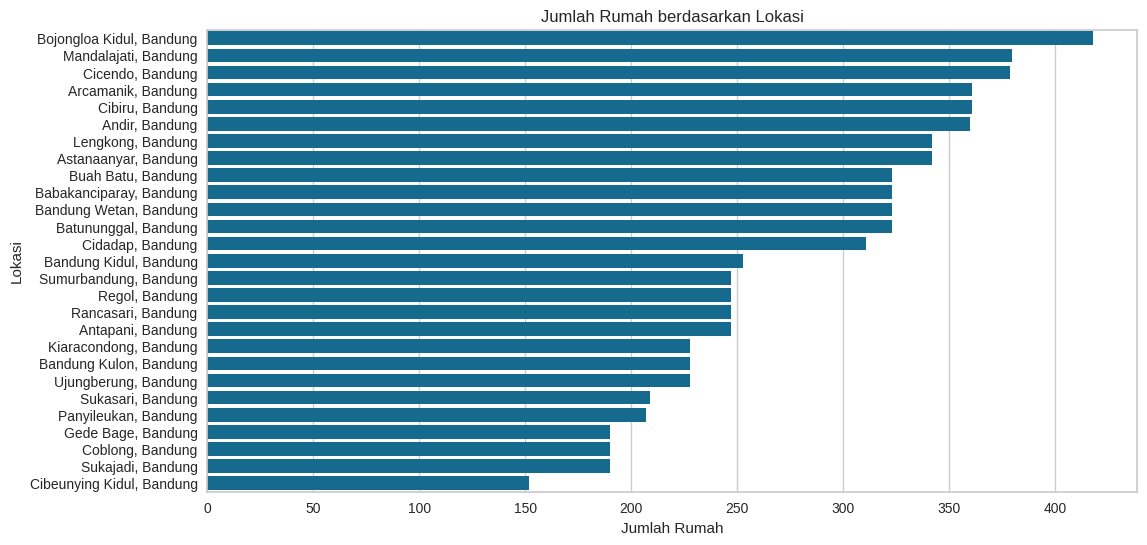

In [96]:
# Analisis kolom kategorikal
print(data['location'].value_counts())
#visualisai
plt.figure(figsize=(12, 6))
sns.countplot(y='location', data=data, order=data['location'].value_counts().index)
plt.title('Jumlah Rumah berdasarkan Lokasi')
plt.xlabel('Jumlah Rumah')
plt.ylabel('Lokasi')
plt.show()

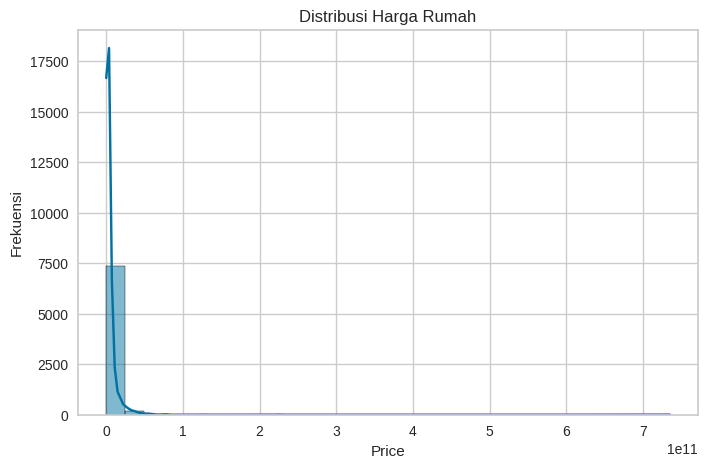

In [97]:
# Visualization
# Visualisasi distribusi harga rumah
plt.figure(figsize=(8, 5))
sns.histplot(data['price'], bins=30, kde=True)
plt.title('Distribusi Harga Rumah')
plt.xlabel('Price')
plt.ylabel('Frekuensi')
plt.show()

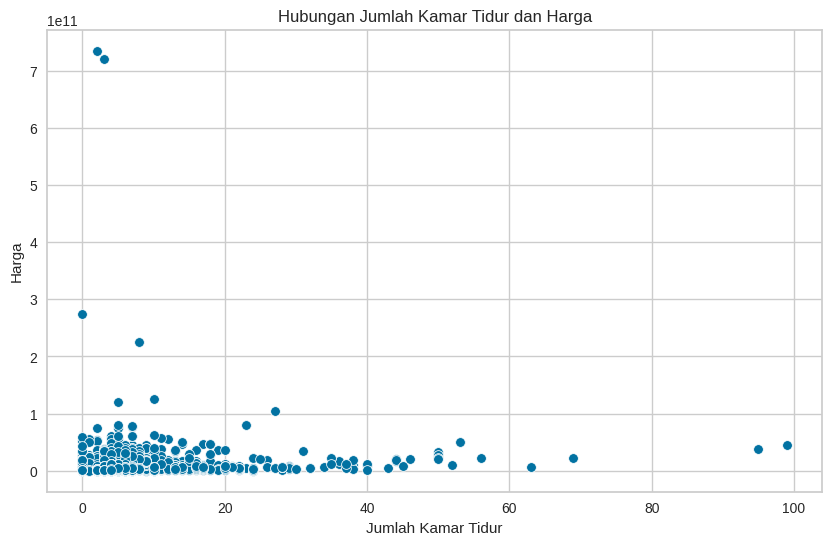

In [98]:
# Visualisasi hubungan antara jumlah kamar tidur dan harga
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bedroom_count', y='price', data=data)
plt.title('Hubungan Jumlah Kamar Tidur dan Harga')
plt.xlabel('Jumlah Kamar Tidur')
plt.ylabel('Harga')
plt.show()

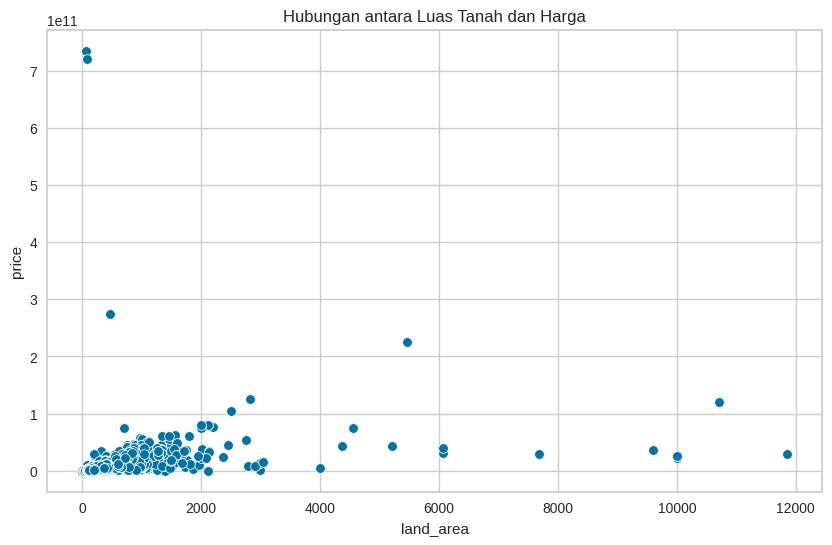

In [99]:
# Scatter plot untuk melihat hubungan antara luas tanah dan harga
plt.figure(figsize=(10, 6))
sns.scatterplot(x='land_area', y='price', data=data)
plt.title('Hubungan antara Luas Tanah dan Harga')
plt.show()

array([[<Axes: title={'center': 'bedroom_count'}>,
        <Axes: title={'center': 'bathroom_count'}>],
       [<Axes: title={'center': 'carport_count'}>,
        <Axes: title={'center': 'price'}>],
       [<Axes: title={'center': 'land_area'}>,
        <Axes: title={'center': 'building_area (m2)'}>]], dtype=object)

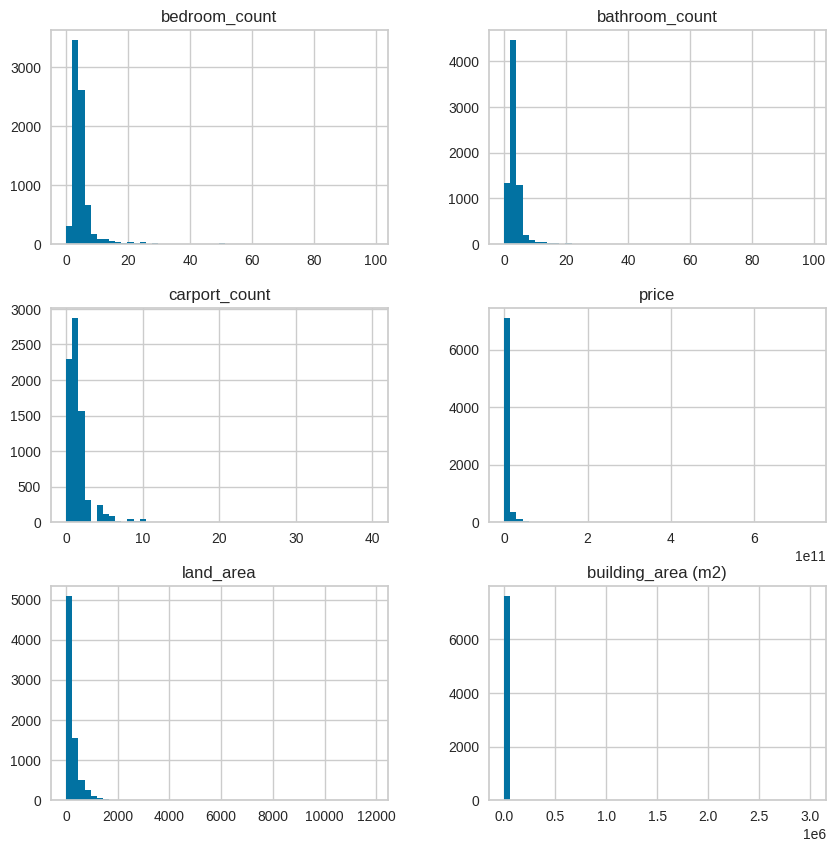

In [100]:
#Histogram
data.hist(bins=50, figsize=(10, 10))

In [101]:
# Grouping dan Agregasi
# Rata-rata harga berdasarkan lokasi
avg_price_location = data.groupby('location')['price'].mean().sort_values(ascending=False)
print(avg_price_location)

location
Bandung Wetan, Bandung       1.740116e+10
Coblong, Bandung             1.499218e+10
Sumurbandung, Bandung        1.386184e+10
Cicendo, Bandung             8.591137e+09
Cidadap, Bandung             8.045238e+09
Bandung Kidul, Bandung       7.184383e+09
Sukajadi, Bandung            6.982842e+09
Sukasari, Bandung            6.069000e+09
Lengkong, Bandung            5.509848e+09
Batununggal, Bandung         4.589783e+09
Bojongloa Kidul, Bandung     4.327189e+09
Andir, Bandung               3.587400e+09
Babakanciparay, Bandung      3.329963e+09
Regol, Bandung               3.326328e+09
Astanaanyar, Bandung         3.174860e+09
Cibiru, Bandung              3.073371e+09
Cibeunying Kidul, Bandung    2.683428e+09
Kiaracondong, Bandung        2.655651e+09
Buah Batu, Bandung           2.641198e+09
Bandung Kulon, Bandung       2.221899e+09
Gede Bage, Bandung           2.059095e+09
Antapani, Bandung            1.885551e+09
Mandalajati, Bandung         1.815834e+09
Arcamanik, Bandung       

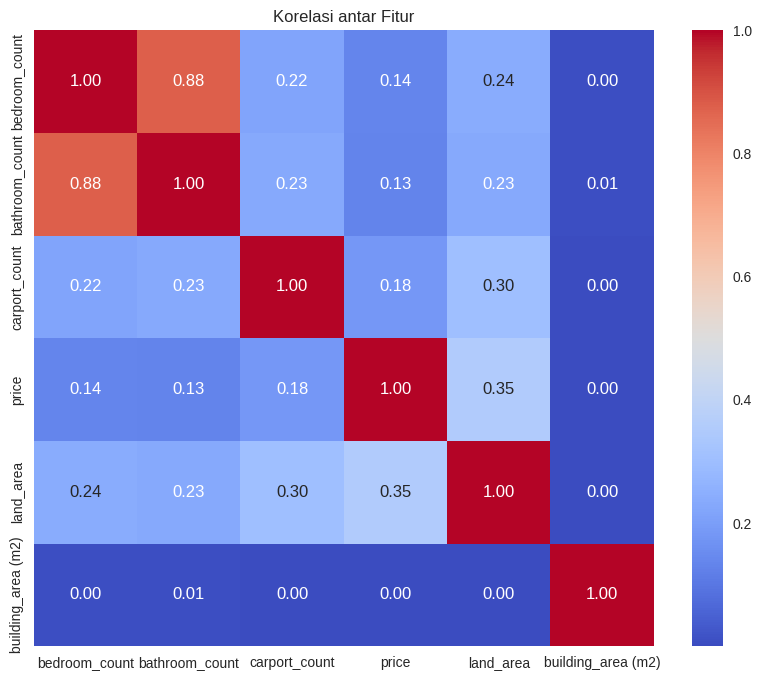

In [102]:
#korelasi
# Memilih hanya kolom numerik termasuk yang telah di-encode
numeric_df = data.select_dtypes(include=['float64', 'int64'])

# Membuat heatmap korelasi antar fitur numerik
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Korelasi antar Fitur')
plt.show()

PreProcessing data

In [103]:
# Memeriksa nilai unik sebelum encoding
print("Unique locations before encoding:", data['location'].unique())

Unique locations before encoding: ['Andir, Bandung' 'Astanaanyar, Bandung' 'Antapani, Bandung'
 'Arcamanik, Bandung' 'Bandung Kidul, Bandung' 'Bandung Kulon, Bandung'
 'Bandung Wetan, Bandung' 'Batununggal, Bandung'
 'Bojongloa Kidul, Bandung' 'Buah Batu, Bandung'
 'Cibeunying Kidul, Bandung' 'Cibiru, Bandung' 'Cicendo, Bandung'
 'Cidadap, Bandung' 'Coblong, Bandung' 'Gede Bage, Bandung'
 'Kiaracondong, Bandung' 'Lengkong, Bandung' 'Mandalajati, Bandung'
 'Panyileukan, Bandung' 'Rancasari, Bandung' 'Regol, Bandung'
 'Sukajadi, Bandung' 'Sukasari, Bandung' 'Sumurbandung, Bandung'
 'Ujungberung, Bandung' 'Babakanciparay, Bandung']


In [104]:
from sklearn.preprocessing import LabelEncoder

# Encode kolom location
le = LabelEncoder()
data['location_encoded'] = le.fit_transform(data['location'])
data

,house_name,location,bedroom_count,bathroom_count,carport_count,price,land_area,building_area (m2),location_encoded
0,Rumah 2 Lantai Bagus Sertifikat Hak Milik di M...,"Andir, Bandung",3,2,2,2100000000,137,170,0
1,Rumah Cantik @ Andir (Sudirman),"Andir, Bandung",3,2,3,4100000000,202,300,0
2,Jual Cepat Rumah di Maleber Rajawali Bisa Untu...,"Andir, Bandung",5,2,1,3300000000,350,258,0
3,Rumah minimalis 3 lantai di andir Bandung coco...,"Andir, Bandung",2,2,1,580000000,30,80,0
4,Jual Rumah Murah Bisa Dijadikan Kos”an Di Jala...,"Andir, Bandung",11,3,0,1300000000,176,176,0
...,...,...,...,...,...,...,...,...,...
7604,"Rumah Lux Terawat di Taman Sakura Raya , Bandung","Babakanciparay, Bandung",4,5,0,11000000000,600,500,4
7605,Rumah 3 Lantai Bagus Terawat di Sumber Sari,"Babakanciparay, Bandung",4,5,2,3200000000,200,600,4
7606,Rumah Besar Elegant Asri Nyaman Sumbersari Ban...,"Babakanciparay, Bandung",6,3,3,5500000000,375,290,4
7607,Rumah strategis nyaman belakang mall sumber sa...,"Babakanciparay, Bandung",5,3,3,4890000000,375,290,4


In [105]:
# Mengganti nama kolom yang memiliki spasi atau karakter lain
data.rename(columns=lambda x: x.replace(" ", "_").replace(",", "").replace("(", "").replace(")", ""), inplace=True)
# Memeriksa kolom yang ada dalam DataFrame setelah mengganti nama
print("Kolom yang ada dalam DataFrame setelah mengganti nama:", data.columns)

Kolom yang ada dalam DataFrame setelah mengganti nama: Index(['house_name', 'location', 'bedroom_count', 'bathroom_count',
       'carport_count', 'price', 'land_area', 'building_area_m2',
       'location_encoded'],
      dtype='object')


In [106]:
data

,house_name,location,bedroom_count,bathroom_count,carport_count,price,land_area,building_area_m2,location_encoded
0,Rumah 2 Lantai Bagus Sertifikat Hak Milik di M...,"Andir, Bandung",3,2,2,2100000000,137,170,0
1,Rumah Cantik @ Andir (Sudirman),"Andir, Bandung",3,2,3,4100000000,202,300,0
2,Jual Cepat Rumah di Maleber Rajawali Bisa Untu...,"Andir, Bandung",5,2,1,3300000000,350,258,0
3,Rumah minimalis 3 lantai di andir Bandung coco...,"Andir, Bandung",2,2,1,580000000,30,80,0
4,Jual Rumah Murah Bisa Dijadikan Kos”an Di Jala...,"Andir, Bandung",11,3,0,1300000000,176,176,0
...,...,...,...,...,...,...,...,...,...
7604,"Rumah Lux Terawat di Taman Sakura Raya , Bandung","Babakanciparay, Bandung",4,5,0,11000000000,600,500,4
7605,Rumah 3 Lantai Bagus Terawat di Sumber Sari,"Babakanciparay, Bandung",4,5,2,3200000000,200,600,4
7606,Rumah Besar Elegant Asri Nyaman Sumbersari Ban...,"Babakanciparay, Bandung",6,3,3,5500000000,375,290,4
7607,Rumah strategis nyaman belakang mall sumber sa...,"Babakanciparay, Bandung",5,3,3,4890000000,375,290,4


In [107]:
#Normalisasi
from sklearn.preprocessing import StandardScaler

# memilih fitur untuk model
features = ['bedroom_count', 'bathroom_count', 'carport_count', 'land_area', 'building_area_m2', 'location_encoded']
X = data[features]

# Target
y = data['price']

# Standarisasi
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [108]:
X

,bedroom_count,bathroom_count,carport_count,land_area,building_area_m2,location_encoded
0,3,2,2,137,170,0
1,3,2,3,202,300,0
2,5,2,1,350,258,0
3,2,2,1,30,80,0
4,11,3,0,176,176,0
...,...,...,...,...,...,...
7604,4,5,0,600,500,4
7605,4,5,2,200,600,4
7606,6,3,3,375,290,4
7607,5,3,3,375,290,4


In [109]:
y

,price
0,2100000000
1,4100000000
2,3300000000
3,580000000
4,1300000000
...,...
7604,11000000000
7605,3200000000
7606,5500000000
7607,4890000000


Modelling

In [110]:
#Split Dataset ( membagi data menjadi data latih dan uji)
from sklearn.model_selection import train_test_split

# Membagi dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [111]:
#Melatih model

# Linier Regression
from sklearn.linear_model import LinearRegression

# Inisialisasi model
lr_model = LinearRegression()

In [112]:
# Latih model
lr_model.fit(X_train, y_train)

LinearRegression()

In [113]:
# Prediksi
y_pred_lr = lr_model.predict(X_test)

In [114]:
from sklearn.ensemble import RandomForestRegressor

# Inisialisasi model
rf_model = RandomForestRegressor(random_state=42)

In [115]:
# Latih model Random forest
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [116]:
# Prediksi
y_pred_rf = rf_model.predict(X_test)

In [117]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Evaluasi Linear Regression
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression - MAE: {mae_lr}, MSE: {mse_lr}, R²: {r2_lr}")

Linear Regression - MAE: 2912121927.2201552, MSE: 8.816914824889518e+19, R²: 0.16763417320999652


In [118]:
# Evaluasi Random Forest
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest - MAE: {mae_rf}, MSE: {mse_rf}, R²: {r2_rf}")

Random Forest - MAE: 1773506581.739433, MSE: 8.824458902014194e+19, R²: 0.16692197034562017


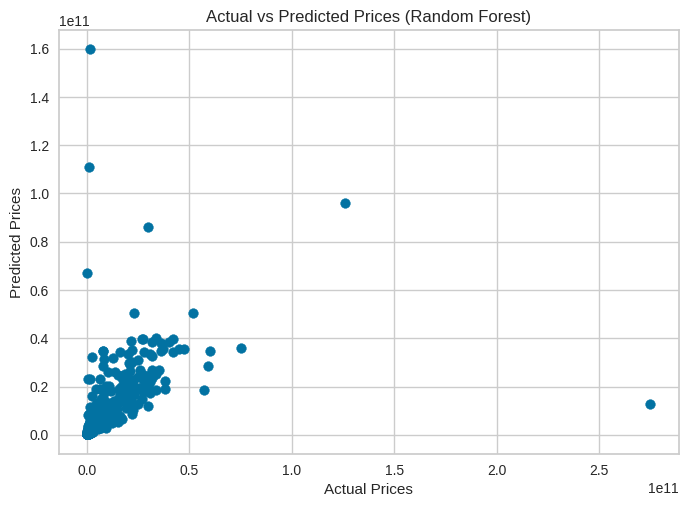

In [119]:
import matplotlib.pyplot as plt

# Plot hasil prediksi (contoh untuk Random Forest)
plt.scatter(y_test, y_pred_rf)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices (Random Forest)")
plt.show()


# MAE : Linier Regression lebih baik daripada random forest
#Karena LR memiliki MAE sebenar 291 juta sedangkan RF 1,77 miliar

#MSE kedua model sangat tinggi, menunjukan bahwa prediksi memiliki eror besar
#R 2  
# Linear Regression: R² = 0.1676 (16.76%)
# Random Forest: R² = 0.1668 (16.68%)
#Interpretasi: (jika mendekati 1 berarti modle sempurna)
#Kedua model hanya mampu menjelaskan ~16.7% dari variansi target. Ini menunjukkan model masih kurang baik dalam menangkap pola data.


Pendekatan PyCaret

In [120]:
!pip install pycaret

In [171]:
import pandas as pd

# Simpan nama kolom asli sebelum scaling
original_columns = X.columns

# Buat DataFrame baru dengan kolom asli
df_scaled = pd.DataFrame(X_scaled, columns=original_columns)
df_scaled['price'] = y

In [172]:
print(df_scaled.dtypes)

bedroom_count       float64
bathroom_count      float64
carport_count       float64
land_area           float64
building_area_m2    float64
location_encoded    float64
price                 int64
dtype: object


In [173]:
exp_reg = setup(data = df_scaled,
                target = 'price',
                session_id = 123,
                normalize = False,
                transformation = False,
                train_size = 0.8,
                fold_strategy = 'kfold',
                fold = 5,
                feature_selection = True,
                remove_multicollinearity = True,
                multicollinearity_threshold = 0.9)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000399 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 630
[LightGBM] [Info] Number of data points in the train set: 6087, number of used features: 6
[LightGBM] [Info] Start training from score 4956299396.252998


,Description,Value
0,Session id,123
1,Target,price
2,Target type,Regression
3,Original data shape,"(7609, 7)"
4,Transformed data shape,"(7609, 2)"
5,Transformed train set shape,"(6087, 2)"
6,Transformed test set shape,"(1522, 2)"
7,Numeric features,6
8,Preprocess,True
9,Imputation type,simple


In [174]:
# Bandingkan semua model
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,2180912428.9417,135833646807152410624.0000,9444784976.3814,0.3891,0.6375,1.2707,0.3540
gbr,Gradient Boosting Regressor,2441040886.5117,137195845539661250560.0000,9495435603.7344,0.3880,0.6472,1.3774,0.5460
xgboost,Extreme Gradient Boosting,2503080836.9226,139054648819719290880.0000,9521921168.7567,0.3853,0.6351,1.4848,0.3020
knn,K Neighbors Regressor,2323198893.9531,139581729019162525696.0000,9581631786.9497,0.3739,0.5905,1.0494,0.1240
lightgbm,Light Gradient Boosting Machine,2537804942.4446,139699969754050035712.0000,9593791696.9587,0.3717,0.6356,1.4886,0.5720
rf,Random Forest Regressor,2232045952.3076,137037728550419169280.0000,9548881228.3640,0.3712,0.6171,1.2553,0.5160
dt,Decision Tree Regressor,2245322609.7989,141172753528733270016.0000,9826969087.5759,0.3174,0.6437,1.2953,0.1180
omp,Orthogonal Matching Pursuit,3067653806.1439,148175751005055614976.0000,10112260079.4991,0.2634,0.9056,1.8374,0.1900
llar,Lasso Least Angle Regression,3067653789.3295,148175751227265744896.0000,10112260100.5548,0.2634,0.9056,1.8374,0.1800
lar,Least Angle Regression,3067653789.3295,148175751227265744896.0000,10112260100.5548,0.2634,0.9056,1.8374,0.1880


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [175]:
# Tampilkan model terbaik
print(best_model)

ExtraTreesRegressor(n_jobs=-1, random_state=123)


In [176]:
from pycaret.regression import setup, compare_models, pull, save_model, tune_model

# Fine-tune model terbaik
tuned_model = tune_model(best_model)

# Tampilkan model yang telah di-tune
print(tuned_model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2305284272.7051,19759706038468571136.0000,4445189089.1692,0.6204,0.7906,1.9634
1,2200753076.8222,20687067570407485440.0000,4548303812.4566,0.4716,0.7227,0.9540
2,3059836227.5159,522976887701400518656.0000,22868687931.3484,0.0570,0.7653,2.5621
3,2901543191.9623,90401128556576309248.0000,9507950807.4336,0.3991,0.7686,1.0115
4,2371368738.8423,27008768929899970560.0000,5196996144.8802,0.5606,0.7253,0.9741
Mean,2567757101.5696,136166711759350562816.0000,9313425557.0576,0.4217,0.7545,1.4930
Std,345168755.6600,195201535088161456128.0000,7030420766.3907,0.1974,0.0264,0.6566


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


ExtraTreesRegressor(max_depth=8, max_features='sqrt',
                    min_impurity_decrease=0.0001, min_samples_leaf=2,
                    min_samples_split=5, n_estimators=240, n_jobs=-1,
                    random_state=123)


EValuasi Model

In [177]:
from pycaret.regression import setup, compare_models, tune_model, save_model, plot_model, predict_model, finalize_model


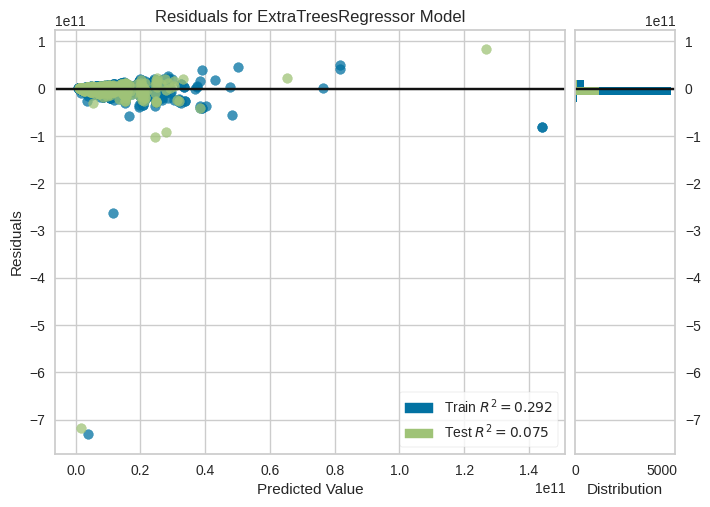

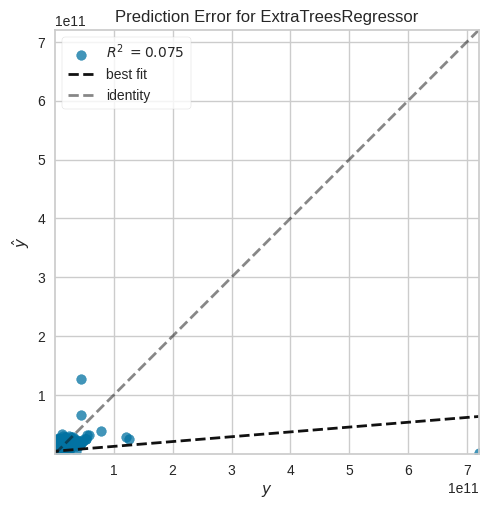

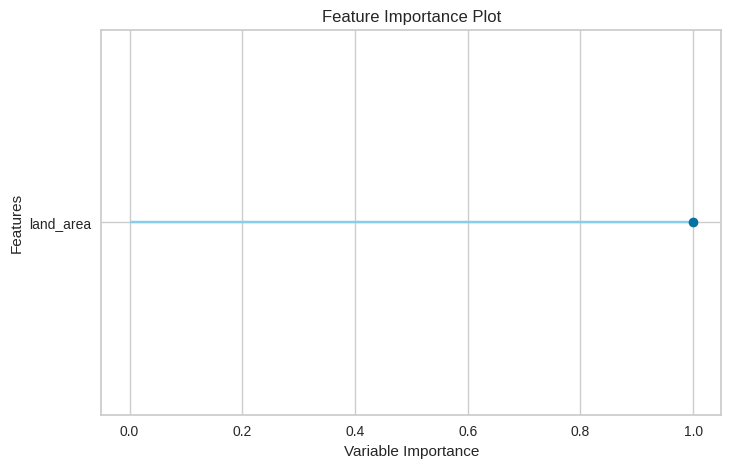

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,2694787983.8500,372471661577488695296.0000,19299524905.4864,0.0750,0.7367,0.9538


In [178]:
# Evaluasi model
plot_model(tuned_model, plot='residuals')  # Visualisasi residuals
plot_model(tuned_model, plot='error')      # Visualisasi error
plot_model(tuned_model, plot='feature')    # Analisis fitur

# Predict data baru
predictions = predict_model(tuned_model)

# Finalisasi model (gunakan untuk deployment)
final_model = finalize_model(tuned_model)


In [179]:
from pycaret.regression import setup, compare_models, evaluate_model
# Mengevaluasi model
evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [180]:
# Simpan model untuk Pycaret
save_model(final_model, 'house_price_prediction_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['bedroom_count', 'bathroom_count',
                                              'carport_count', 'land_area',
                                              'building_area_m2',
                                              'location_encoded'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('remove_multicolli...
                                     transformer=RemoveMulticollinearity(threshold=0.9))),
                 ('feature_selection',
                  TransformerWrapper(exclude=[],
                                     transformer=SelectFromModel(estimator=LGBMRegressor(),
                                                                 max_f

In [181]:
# Ubah X_test menjadi DataFrame
X_test_df = pd.DataFrame(X_test, columns=df_scaled.columns.drop('price'))

# Lakukan prediksi
predictions = predict_model(final_model, data=X_test_df)

Prediksi model dengan data uji y

In [201]:
# Memuat model PyCaret yang sudah disimpan
from pycaret.regression import load_model, predict_model

# Memuat model
model = load_model('house_price_prediction_model')

Transformation Pipeline and Model Successfully Loaded


In [202]:
#prediction
predictions = predict_model(model, data=X_test_df)
#evalusi
# Menghitung error dengan data uji
mse = mean_squared_error(y_test, predictions['prediction_label'])
mae = mean_absolute_error(y_test, predictions['prediction_label'])
r2 = r2_score(y_test, predictions['prediction_label'])

# Menampilkan hasil
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

Mean Squared Error: 6.7592481794636055e+19
Mean Absolute Error: 2461381232.1903615
R-squared: 0.3618893557306708


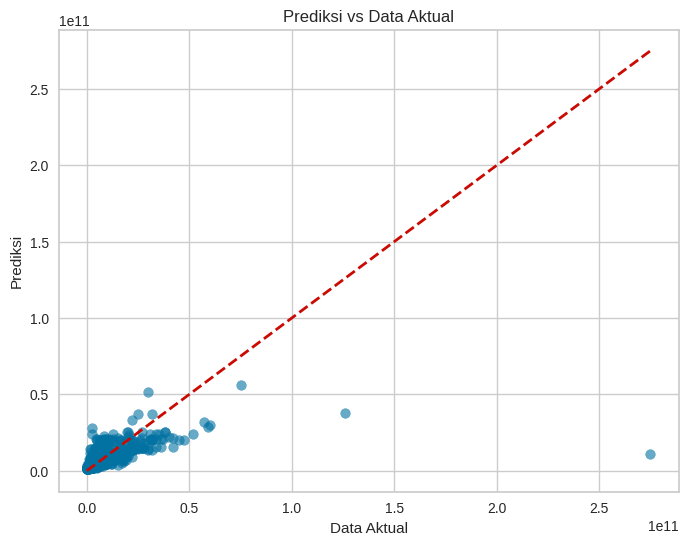

In [203]:
# 1. Plot Scatter: Prediksi vs Data Aktual
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions['prediction_label'], alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Garis diagonal ideal
plt.title('Prediksi vs Data Aktual')
plt.xlabel('Data Aktual')
plt.ylabel('Prediksi')
plt.grid(True)
plt.show()

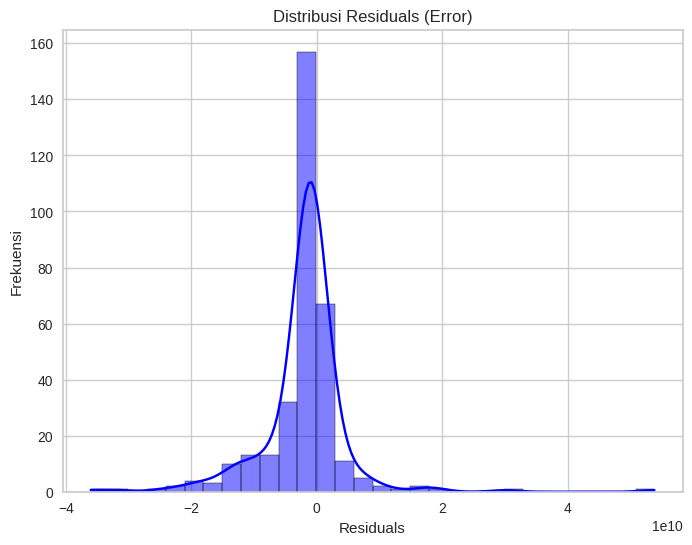

In [200]:
# 2. Plot Histogram Error (Residuals)
residuals = y_test - predictions['prediction_label']

plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color='blue', bins=30)
plt.title('Distribusi Residuals (Error)')
plt.xlabel('Residuals')
plt.ylabel('Frekuensi')
plt.grid(True)
plt.show()

Prediksi menggunakan data baru

In [207]:
# Memuat model PyCaret yang sudah disimpan
from pycaret.regression import load_model, predict_model

# Memuat model
model = load_model('house_price_prediction_model')

# Data baru untuk prediksi
new_data = pd.DataFrame({
    'bedroom_count': [3],
    'bathroom_count': [2],
    'carport_count': [1],
    'land_area': [150],
    'building_area_m2': [120],
    'location_encoded': [5]
})

# Prediksi untuk data baru
new_predictions = predict_model(model, data=new_data)
print(predictions[['prediction_label']])

Transformation Pipeline and Model Successfully Loaded


   prediction_label
0      5.164255e+10


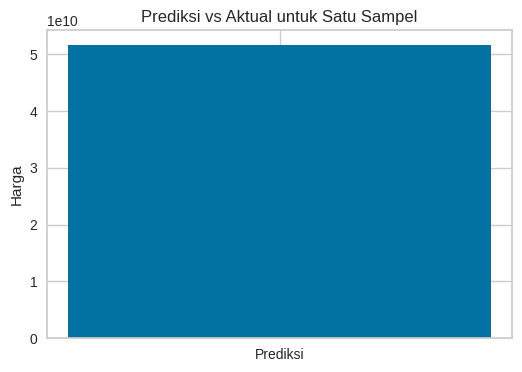

In [208]:
# Visualisasi untuk satu sampel
plt.figure(figsize=(6, 4))
plt.bar(['Prediksi', 'Aktual'], [new_predictions['prediction_label'][0], np.nan])
plt.title('Prediksi vs Aktual untuk Satu Sampel')
plt.ylabel('Harga')
plt.show()


Evalusi terhadap data uji y